In [3]:
pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.1 MB/s eta 0:00:00
  

In [4]:
import numpy as np
from matplotlib.pyplot import subplots, cm
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay

In [5]:
roc_curve = RocCurveDisplay.from_estimator

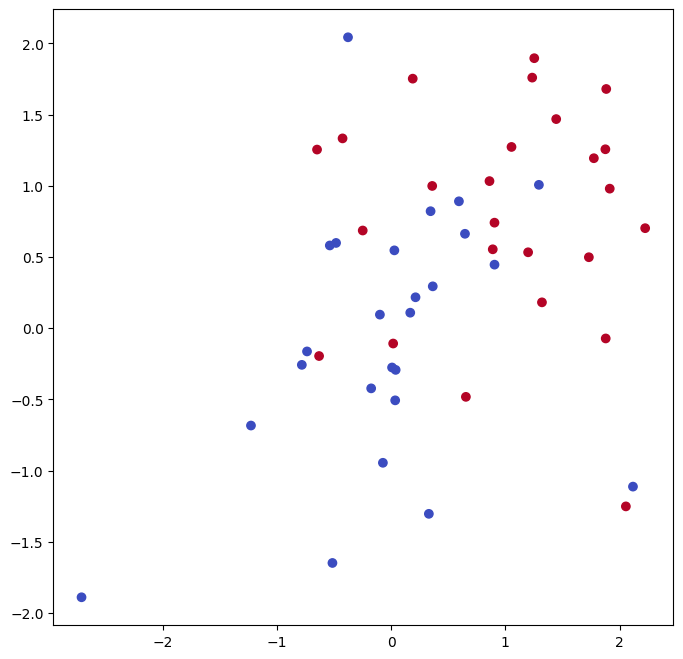

In [6]:
rng = np.random.default_rng(1)
X = rng.standard_normal((50,2))
y = np.array([-1]*25+[1]*25)
X[y==1] +=1
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],
           X[:,1],
           c=y,
           cmap=cm.coolwarm)

In [8]:
svm_linear = SVC(C=10, kernel='linear')
svm_linear.fit(X, y)

SVC(C=10, kernel='linear')

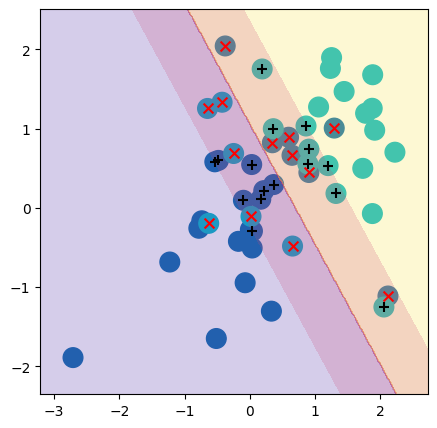

In [11]:
fig, ax = subplots(figsize=(5,5))
plot_svm(X, y, svm_linear, ax=ax)

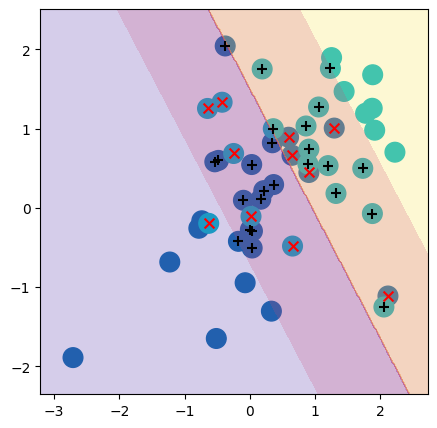

In [13]:
svm_linear_small = SVC(C=0.1, kernel='linear')
svm_linear_small.fit(X,y)
fig, ax = subplots(figsize=(5,5))
plot_svm(X, y, svm_linear_small, ax=ax)

In [14]:
svm_linear.coef_

array([[1.17303943, 0.77348227]])

In [15]:
kfold = skm.KFold(5, random_state=0, shuffle=True)
grid = skm.GridSearchCV(svm_linear, {'C':[0.001, 0.01, 0.1,1,5,10,100]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(X,y)
grid.best_params_

{'C': 1}

In [16]:
grid.cv_results_[('mean_test_score')]

array([0.46, 0.46, 0.72, 0.74, 0.74, 0.74, 0.74])

In [17]:
X_test = rng.standard_normal((20,2))
y_test = np.array([-1]*10+[1]*10)
X_test[y_test==1] +=1

In [18]:
best_ = grid.best_estimator_
y_test_hat = best_.predict(X_test)
confusion_table(y_test_hat, y_test)

Truth,-1,1
Predicted,,
-1,8,4
1,2,6


In [20]:
svm_ = SVC(C=0.001, kernel='linear').fit(X,y)
y_test_hat = svm_.predict(X_test)
confusion_table(y_test_hat, y_test)

Truth,-1,1
Predicted,,
-1,2,0
1,8,10


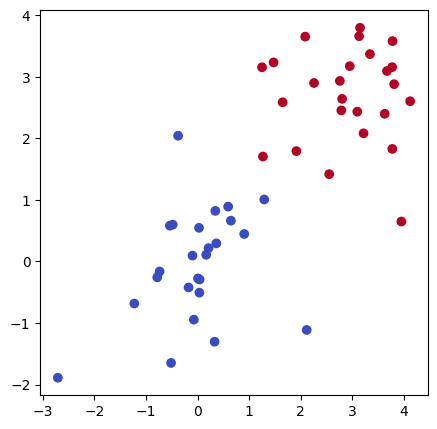

In [21]:
X[y==1] +=1.9
fig, ax= subplots(figsize=(5,5))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm)

In [22]:
svm_ = SVC(C=1e5, kernel='linear').fit(X,y)
y_hat = svm_.predict(X)
confusion_table(y_hat, y)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


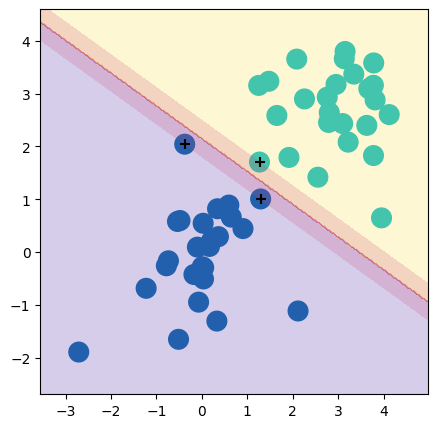

In [23]:
fig, ax = subplots(figsize=(5,5))
plot_svm(X, y, svm_, ax=ax)

In [24]:
svm_ = SVC(C=0.1, kernel='linear').fit(X,y)
y_hat = svm_.predict(X)
confusion_table(y_hat, y)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


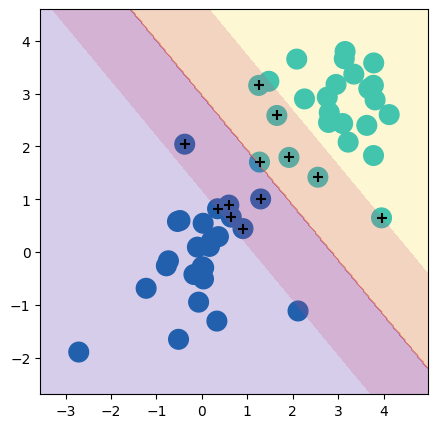

In [25]:
fig, ax = subplots(figsize=(5,5))
plot_svm(X, y, svm_, ax=ax)

### Support Vector Classifier with Poly Kernel

In [27]:
X = rng.standard_normal((200,2))
X[:100] +=2
X[100:150] -=2
y = np.array([1]*150+[2]*50)

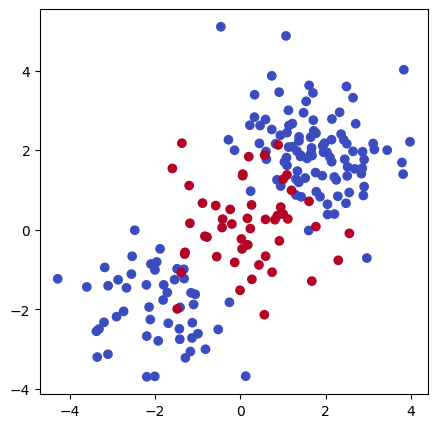

In [29]:
fig, ax = subplots(figsize=(5,5))
ax.scatter(X[:,0],
           X[:,1],
           c=y,
           cmap=cm.coolwarm)

In [31]:
(X_train, X_test, y_train, y_test) = skm.train_test_split(X, y, test_size=0.5, random_state=0)
svm_rbf = SVC(kernel='rbf', gamma=1, C=1)
svm_rbf.fit(X_train, y_train)

SVC(C=1, gamma=1)

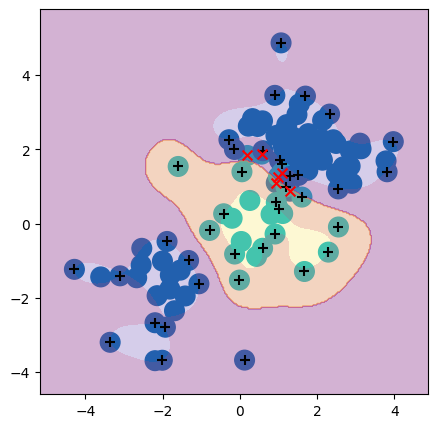

In [32]:
fig, ax = subplots(figsize=(5,5))
plot_svm(X_train, y_train, svm_rbf, ax=ax)

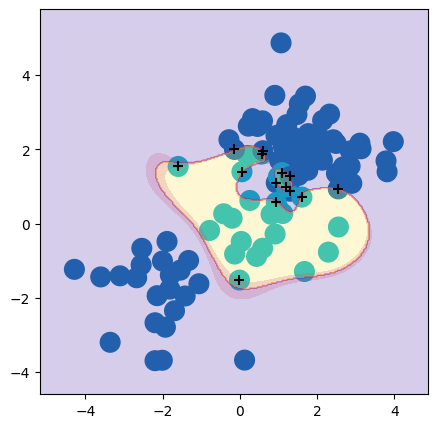

In [33]:
svm_rbf = SVC(kernel='rbf', gamma=1, C=1e5)
svm_rbf.fit(X_train, y_train)
fig, ax = subplots(figsize=(5,5))
plot_svm(X_train, y_train, svm_rbf, ax=ax)

In [39]:
kfold = skm.KFold(5, random_state=0, shuffle=True)
grid = skm.GridSearchCV(svm_rbf, {'C':[0.1,1, 10, 100,1000],
                               'gamma':[0.5,1,2,3,4]},
                    refit=True,
                    cv=kfold,
                    scoring='accuracy')
grid.fit(X_train, y_train)
grid.best_params_

{'C': 1, 'gamma': 0.5}

Truth,1,2
Predicted,,
1,69,6
2,6,19


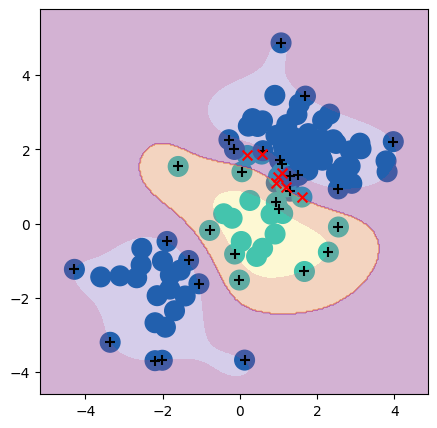

In [41]:
best_svm = grid.best_estimator_
fig, ax = subplots(figsize=(5,5))
plot_svm(X_train, y_train, best_svm, ax=ax)

y_hat_test = best_svm.predict(X_test)
confusion_table(y_hat_test, y_test)

ROC Curve

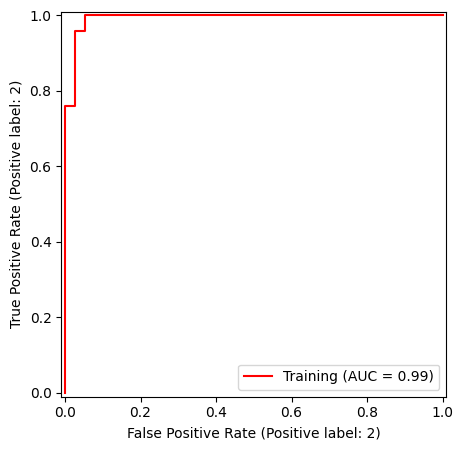

In [42]:
fig, ax = subplots(figsize=(5,5))
roc_curve(best_svm,
          X_train,
          y_train,
          name='Training',
          color='r',
          ax=ax)

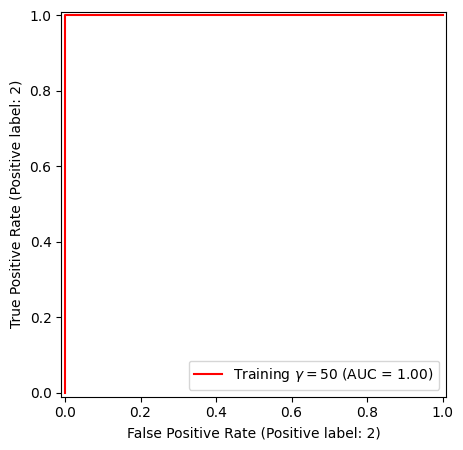

In [43]:
svm_flex = SVC(kernel='rbf', gamma=50, C=1)
svm_flex.fit(X_train, y_train)
fig, ax = subplots(figsize=(5,5))
roc_curve(svm_flex,
          X_train,
          y_train,
          name='Training $\gamma=50$',
          color='r',
          ax=ax)

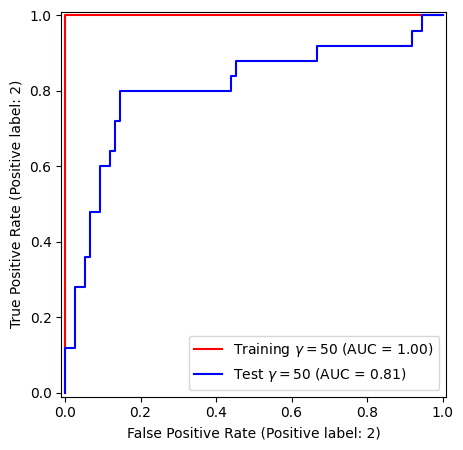

In [44]:
roc_curve(svm_flex,
          X_test,
          y_test,
          name='Test $\gamma=50$',
          color='b',
          ax=ax)
fig

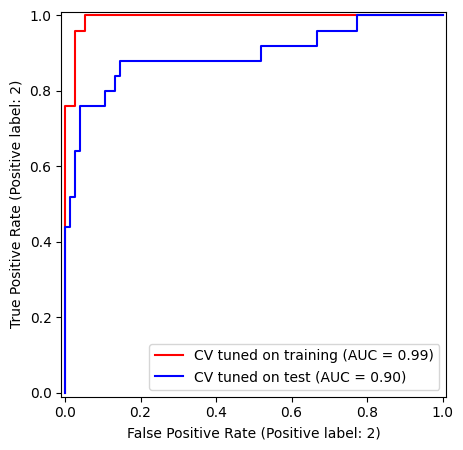

In [46]:
fig, ax = subplots(figsize=(5,5))
for (X_, y_, c, name) in zip((X_train, X_test),(y_train,y_test),('r','b'), ('CV tuned on training', 'CV tuned on test')):
  roc_curve(best_svm, X_, y_, name=name, ax=ax, color=c)